In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [232]:
# Load CSV files using a safe path
matches = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/IPL/matches.csv')
deliveries = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/IPL/deliveries.csv')

In [233]:
# Show first few rows to confirm
print(matches.head())
print(deliveries.head())

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [234]:
# Drop matches without a result or winner
matches = matches[matches['result'] == 'normal']
matches = matches.dropna(subset=['winner'])


In [235]:
# Keep useful columns only
matches = matches[['id', 'season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

In [236]:
matches.rename(columns={'id': 'match_id'}, inplace=True)

In [237]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
for col in ['team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'venue', 'city']:
    matches[col] = encoder.fit_transform(matches[col])

In [238]:
# Total runs scored per team per match
runs_per_match = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
runs_per_match.rename(columns={'total_runs': 'team_runs'}, inplace=True)

In [239]:
# Encode batting_team
runs_per_match['batting_team'] = encoder.fit_transform(runs_per_match['batting_team'])

In [240]:
# Create team1_runs and team2_runs columns
team1_runs = runs_per_match.groupby('match_id').nth(0).reset_index()
team2_runs = runs_per_match.groupby('match_id').nth(1).reset_index()

In [241]:
team1_runs.rename(columns={'team_runs': 'team1_runs', 'batting_team': 'team1_encoded'}, inplace=True)
team2_runs.rename(columns={'team_runs': 'team2_runs', 'batting_team': 'team2_encoded'}, inplace=True)


In [242]:
# Merge runs with match data
match_features = pd.merge(matches, team1_runs[['match_id', 'team1_runs']], on='match_id', how='left')
match_features = pd.merge(match_features, team2_runs[['match_id', 'team2_runs']], on='match_id', how='left')


In [243]:
# Drop rows with missing run data
match_features.dropna(inplace=True)

In [244]:
features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'city', 'team1_runs', 'team2_runs']
target = 'winner'


In [245]:
X = match_features[features]
y = match_features[target]

In [246]:
from sklearn.model_selection import train_test_split


In [247]:

# Load data
matches = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/IPL/matches.csv')

# Encode categorical variables
encoder = LabelEncoder()
for col in ['team1', 'team2', 'toss_winner', 'toss_decision', 'winner']:
    matches[col] = encoder.fit_transform(matches[col])

X = matches[['team1', 'team2', 'toss_winner', 'toss_decision']]
y = matches['winner']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model and train
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

Predictions and Evaluation

In [248]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.4657534246575342

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.67      0.61        27
           1       0.29      0.67      0.40         3
           2       0.40      0.29      0.33         7
           3       0.46      0.46      0.46        13
           4       0.67      0.33      0.44         6
           5       1.00      0.67      0.80         6
           6       0.40      0.38      0.39        21
           7       0.00      0.00      0.00         2
           8       0.54      0.54      0.54        28
           9       0.60      0.50      0.55         6
          10       0.37      0.55      0.44        20
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         5
          13       0.50      0.44      0.47        25
          14       0.50      0.33      0.40         3
          16       0.37      0.37      0.37        30
          17       1.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

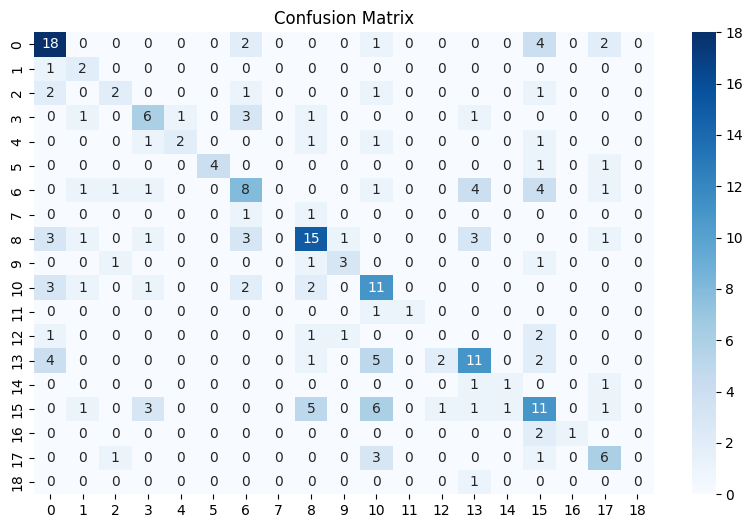

In [249]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
